In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
%matplotlib inline

In [27]:
(x_train, y_train), (x_test, y_test) = load_data()

In [28]:
sample_images, sample_labels = [],[]
for i, (img, lbl) in enumerate(zip(x_train, y_train)):
    sample_images.append(img)
    sample_labels.append(lbl)
    if i>=9: break

(28, 28)


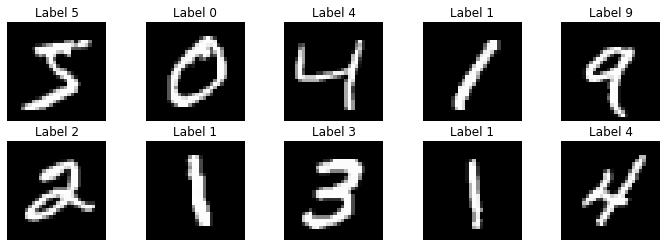

In [31]:


f, axes = plt.subplots(2, 5, figsize=(12,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label {}".format(lbl))

In [40]:


K.clear_session()

autoencoder = models.Sequential(
    [layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(784, activation='tanh')]
)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


In [41]:
norm_x_train = ((x_train - 128.0)/128.0).reshape([-1,784])

In [42]:
history = autoencoder.fit(norm_x_train, norm_x_train, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1429
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0866
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0781
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0707
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0671
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0638
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0616
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0601
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0589
Epoch 10/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0578


Text(0.5, 1.0, 'Autoencoder reconstruction loss for MNIST dataset')

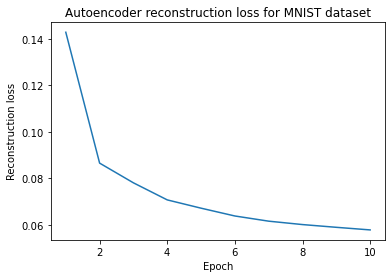

In [49]:
plt.plot(np.arange(1,11), history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Reconstruction loss")
plt.title("Autoencoder reconstruction loss for MNIST dataset")